Initial analysis
----------------

This notebook contains some basic analysis of the data set `software_data`. The data
have been collected using the script `scraping_num_articles.py`. 

Here we will briefly examine the number of different articles, their provenance
and the year of publiation. 

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv('../software_data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2057 entries, 0 to 2056
Data columns (total 12 columns):
Unnamed: 0    2057 non-null int64
abstract      2053 non-null object
author        2055 non-null object
date          2057 non-null int64
journal       2046 non-null object
key           2057 non-null object
key_word      1294 non-null object
pages         1305 non-null object
provenance    2057 non-null object
score         273 non-null float64
title         2057 non-null object
unique_key    2057 non-null object
dtypes: float64(1), int64(2), object(9)
memory usage: 192.9+ KB


Pandas info function shows us the information of the data set itself. 

We can see that the sata set contains the following columns:
- Abstract. The abstract of the article.
- Author. A single entity of an author from the list of authors of the respective article.
- Date. Date of publication.
- Journal. Journal of publication. 
- Key. A generated key containing an authors name and publication year (ex. Glynatsi2017).                
- Key_word. A signle entity of a keyword assigned to the article by the given journal.
- Labels. A single entity of labels assigned to the article manual by us.                 
- Pages. Pages of publication.              
- Provenance. Scholarly database for where the article was collected.                 
- Score. Score given to article by the given journal.              
- Title. Title of article.              
- Unique key.  A unique key generated using the hashlib python library (https://docs.python.org/2/library/hashlib.html). The hashable string is created by: [author name, title, year,abstract]

In [5]:
# number of unique articles
len(df['unique_key'].unique())

232

In [6]:
# their provenance
provenance_table = df.groupby(['unique_key', 
                               'provenance']).size().reset_index()
provenance_table = provenance_table.groupby('provenance').size()

In [7]:
provenance_table

provenance
IEEE        52
PLOS        60
Springer    60
arXiv       60
dtype: int64

In [8]:
prov_per_year = df.groupby(['unique_key','provenance', 
                      'date']).size().reset_index()
prov_per_year = prov_per_year.groupby(['provenance', 'date']).size()

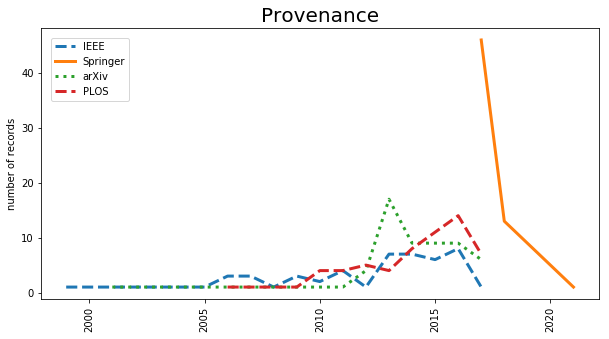

In [9]:
fig = plt.figure(figsize=(10, 5))

plt.title('Provenance', fontsize=20)
plt.ylabel('number of records', fontsize=10); 

plt.yticks(fontsize=10)
plt.xticks(fontsize=10, rotation=90); 
    
plt.plot(prov_per_year['IEEE'], linestyle='--', label="IEEE", linewidth=3)
plt.plot(prov_per_year['Springer'], label="Springer", linewidth=3)
plt.plot(prov_per_year['arXiv'], linestyle=':', label="arXiv", linewidth=3)
plt.plot(prov_per_year['PLOS'], linestyle='--',label="PLOS", linewidth=3)

plt.legend(loc=2, borderaxespad=1, fontsize=10)
plt.show()

In [10]:
articles_per_year = df.groupby(['unique_key', 
                                'date']).size().reset_index().groupby('date').size()

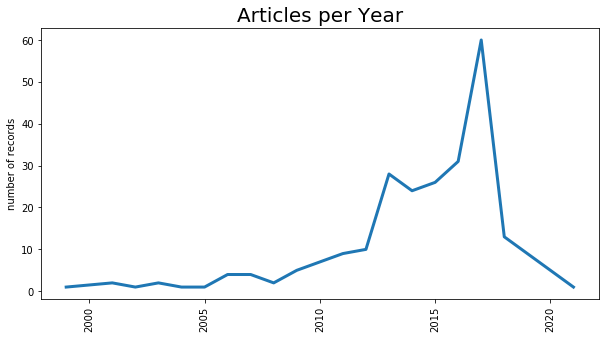

In [11]:
fig, ax = plt.subplots(figsize=(10, 5))

plt.title('Articles per Year', fontsize=20)
plt.ylabel('number of records', fontsize=10); 

ax.plot(articles_per_year, zorder=1, linewidth=3)

plt.yticks(fontsize=10)
plt.xticks(fontsize=10, rotation=90); 

plt.show()